In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


# ***MULTIPLE REGRESSION ANALYSIS***
# ***(Droping Categorial Attributes)***

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df=df.drop(columns=['Extracurricular Activities'])
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,1,49,4,2,23.0
9996,7,64,8,5,58.0
9997,6,83,8,5,74.0
9998,9,97,7,0,95.0


In [5]:
features=['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced']
X=df[features]

In [6]:
target=['Performance Index']
y=df[target]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(8000, 4)
(8000, 1)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
w = model.coef_
b = model.intercept_

print("Coefficients:", w)
print("Intercept:", b)

Coefficients: [[2.85289351 1.01703572 0.47331832 0.19172629]]
Intercept: [-33.60206733]


In [10]:
predictions = model.predict(X_test)
print("Predictions on testing data:", predictions)

Predictions on testing data: [[55.00786377]
 [22.31444624]
 [47.59404705]
 ...
 [16.48182916]
 [63.64243731]
 [46.23799491]]


In [11]:
# Calculate R-squared
test_r2 = r2_score(y_test, predictions)

# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [12]:
print("Testing R-squared:", test_r2)
print("Testing RMSE:", test_rmse)

Testing R-squared: 0.9887144552384186
Testing RMSE: 2.045056213064525


In [13]:
# another way to get R square
print(model.score(X_test,y_test)) 

0.9887144552384186


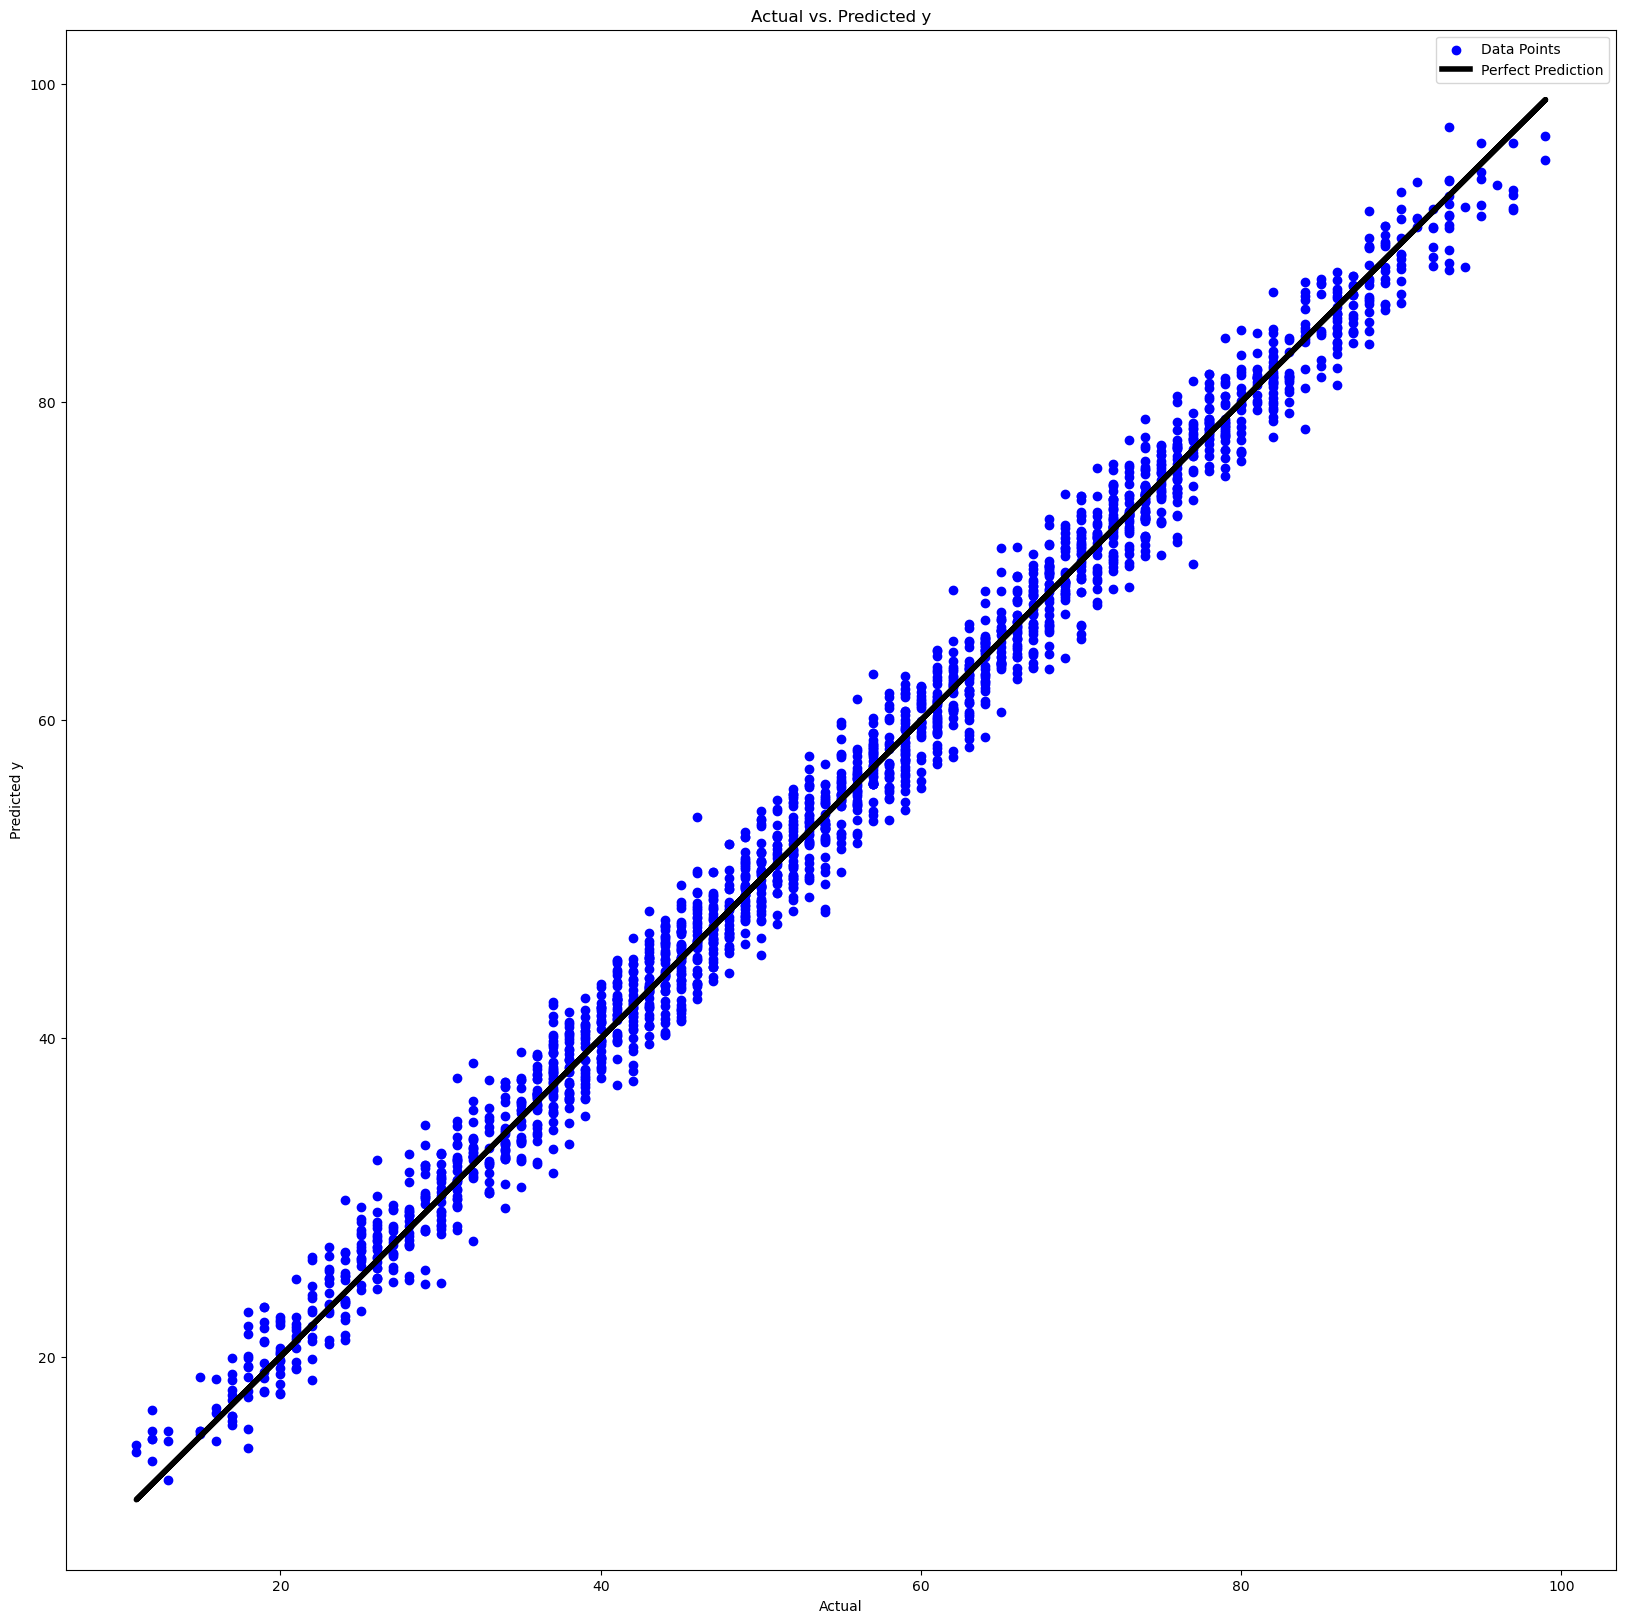

In [14]:
# Create a larger figure
plt.figure(figsize=(20, 20))
plt.scatter(y_test.iloc[:, 0], predictions[:, 0], color='b', label='Data Points')
plt.plot(y_test.iloc[:, 0], y_test.iloc[:, 0], color='k',linewidth=4, label='Perfect Prediction')
plt.xlabel(f'Actual')
plt.ylabel(f'Predicted y')
plt.title(f'Actual vs. Predicted y')
plt.legend()
plt.show()